In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# Let's Clean Some Data

Fivethirtyeight has some great data sets and this is one of them. In July 2014, before the third Star Wars trilogy was released, they decided to survey Americans to see which of the first six movies was their favorite. Let's take a look at the results. Some light cleaning should make it more usable!

In [2]:
# import libraries and csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [3]:
# explore the data frame
display(star_wars.head(10))
display(star_wars.columns)
display(star_wars.shape)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

(1186, 38)

In [4]:
# rename columns
new_columns = {"Have you seen any of the 6 films in the Star Wars franchise?":"Seen any of the first 6 Star Wars movies?",
               "Do you consider yourself to be a fan of the Star Wars film franchise?":"Fan of the Star Wars franchise?",
               "Which of the following Star Wars films have you seen? Please select all that apply." : "seen_ep_1",
               "Unnamed: 4" : "seen_ep_2",
               "Unnamed: 5" : "seen_ep_3",
               "Unnamed: 6" : "seen_ep_4",
               "Unnamed: 7" : "seen_ep_5",
               "Unnamed: 8" : "seen_ep_6",
               "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.":"rank_ep_1",
               "Unnamed: 10":"rank_ep_2",
               "Unnamed: 11":"rank_ep_3",
               "Unnamed: 12":"rank_ep_4",
               "Unnamed: 13":"rank_ep_5",
               "Unnamed: 14":"rank_ep_6"}

star_wars = star_wars.rename(columns = new_columns)

In [5]:
# value counts for columns 1:3
print(star_wars["Seen any of the first 6 Star Wars movies?"].value_counts(dropna=False))
print(star_wars["Fan of the Star Wars franchise?"].value_counts(dropna=False))
print(star_wars["seen_ep_1"].value_counts(dropna=False))

Yes    936
No     250
Name: Seen any of the first 6 Star Wars movies?, dtype: int64
Yes    552
NaN    350
No     284
Name: Fan of the Star Wars franchise?, dtype: int64
Star Wars: Episode I  The Phantom Menace    673
NaN                                         513
Name: seen_ep_1, dtype: int64


In [6]:
# switch values to boolean for columns 1:2
yes_no_bool = {"Yes":True, "No":False}
star_wars["Seen any of the first 6 Star Wars movies?"] = star_wars["Seen any of the first 6 Star Wars movies?"].map(yes_no_bool)
star_wars["Fan of the Star Wars franchise?"] = star_wars["Fan of the Star Wars franchise?"].map(yes_no_bool)


# switch values to boolean for columns 3:9
watch_bool = {"Star Wars: Episode I  The Phantom Menace" : True,
              "Star Wars: Episode II  Attack of the Clones" : True,
              "Star Wars: Episode III  Revenge of the Sith" : True,
              "Star Wars: Episode IV  A New Hope" : True,
              "Star Wars: Episode V The Empire Strikes Back" : True,
              "Star Wars: Episode VI Return of the Jedi" : True,
              np.NaN : False}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(watch_bool)

# value counts for columns 1:3
print(star_wars["Seen any of the first 6 Star Wars movies?"].value_counts(dropna=False))
print(star_wars["Fan of the Star Wars franchise?"].value_counts(dropna=False))
display(star_wars.iloc[:,3].value_counts(dropna=False))

True     936
False    250
Name: Seen any of the first 6 Star Wars movies?, dtype: int64
True     552
NaN      350
False    284
Name: Fan of the Star Wars franchise?, dtype: int64


True     673
False    513
Name: seen_ep_1, dtype: int64

In [7]:
# convert rankings to float
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

# star_wars.columns[9].dtype # why does this work sometimes?
star_wars.iloc[:,9].dtype

dtype('float64')

# Closer Look
Now that the columns are renamed and the values have been changed to True/False we can start analyzing the data.

In [8]:
# get average value for seen any, fan, which episode, rankings by episode
group_means = star_wars.iloc[:,1:15].mean()
display(group_means)

# totals
group_sums = star_wars.iloc[:,1:9].sum()
display(group_sums)

gender_means = star_wars.groupby("Gender").mean()
display(gender_means)

gender_sums = star_wars.groupby("Gender").sum()
gender_sums = gender_sums.iloc[:,0:8]
gender_sums

Seen any of the first 6 Star Wars movies?    0.789207
Fan of the Star Wars franchise?              0.660287
seen_ep_1                                    0.567454
seen_ep_2                                    0.481450
seen_ep_3                                    0.463744
seen_ep_4                                    0.511804
seen_ep_5                                    0.639123
seen_ep_6                                    0.622260
rank_ep_1                                    3.732934
rank_ep_2                                    4.087321
rank_ep_3                                    4.341317
rank_ep_4                                    3.272727
rank_ep_5                                    2.513158
rank_ep_6                                    3.047847
dtype: float64

Seen any of the first 6 Star Wars movies?    936
Fan of the Star Wars franchise?              552
seen_ep_1                                    673
seen_ep_2                                    571
seen_ep_3                                    550
seen_ep_4                                    607
seen_ep_5                                    758
seen_ep_6                                    738
dtype: object

,RespondentID,Seen any of the first 6 Star Wars movies?,seen_ep_1,seen_ep_2,seen_ep_3,seen_ep_4,seen_ep_5,seen_ep_6,rank_ep_1,rank_ep_2,rank_ep_3,rank_ep_4,rank_ep_5,rank_ep_6
Gender,,,,,,,,,,,,,,
Female,3.289817e+09,0.723133,0.542805,0.431694,0.404372,0.464481,0.642987,0.615665,3.429293,3.954660,4.418136,3.544081,2.569270,3.078086
Male,3.290478e+09,0.851107,0.726358,0.649899,0.637827,0.688129,0.788732,0.778672,4.037825,4.224586,4.274882,2.997636,2.458629,3.002364


,RespondentID,Seen any of the first 6 Star Wars movies?,seen_ep_1,seen_ep_2,seen_ep_3,seen_ep_4,seen_ep_5,seen_ep_6
Gender,,,,,,,,
Female,1806109676556,397,298,237,222,255,353,338
Male,1635367528067,423,361,323,317,342,392,387


In [9]:
# math check :)
display(star_wars["Seen any of the first 6 Star Wars movies?"].value_counts(dropna=False))

display(star_wars["Fan of the Star Wars franchise?"].value_counts(dropna=False))
display(552/(552+284))

True     936
False    250
Name: Seen any of the first 6 Star Wars movies?, dtype: int64

True     552
NaN      350
False    284
Name: Fan of the Star Wars franchise?, dtype: int64

0.6602870813397129

In [10]:
# fan_nan
fan_nan = star_wars[(star_wars.iloc[:,1] == True) & (star_wars.iloc[:,2].isna())]
display(fan_nan.head())
display(fan_nan.shape)

,RespondentID,Seen any of the first 6 Star Wars movies?,Fan of the Star Wars franchise?,seen_ep_1,seen_ep_2,seen_ep_3,seen_ep_4,seen_ep_5,seen_ep_6,rank_ep_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
10,3292637870,True,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,3291669388,True,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,3291570206,True,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,3291469991,True,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,3291420030,True,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(100, 38)

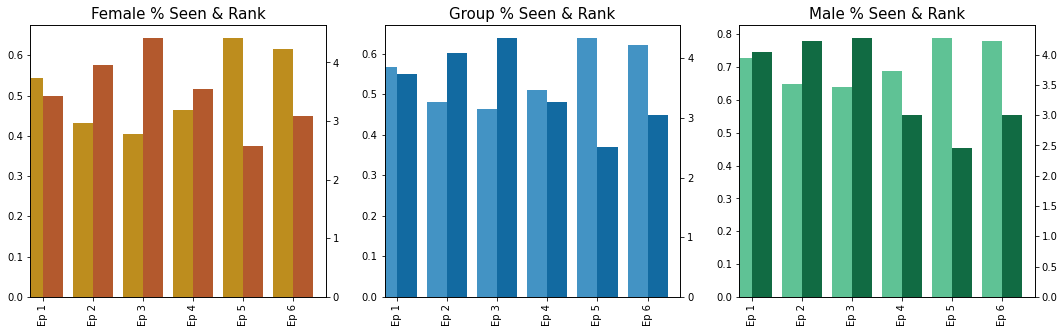

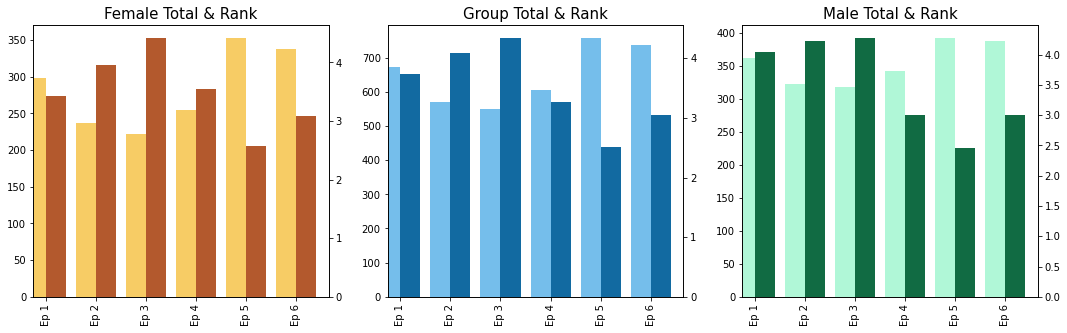

In [11]:
# female, group, and male % seen and total seen compared to rank (1 is good!)
ep_index = ["Ep 1","Ep 2","Ep 3","Ep 4","Ep 5","Ep 6"]

# % seen and rank
fig = plt.figure(figsize=(18,5))
ax = fig.add_subplot(131) # female % seen and average rank
ax2 = ax.twinx() 
width = 0.4
gender_means.iloc[0,2:8].plot(kind="bar", color="#BD8D1E", ax=ax, width=width, position=1)
gender_means.iloc[0,8:14].plot(kind="bar", color="#B3592D", ax=ax2, width=width, position=0)
ax.set_xticks([0,1,2,3,4,5])
ax.set_xticklabels(ep_index)
plt.title("Female % Seen & Rank", size=15)
ax = fig.add_subplot(132) # group % seen and average rank
ax2 = ax.twinx() 
width = 0.4
group_means.iloc[2:8].plot(kind="bar", color="#4393C4", ax=ax, width=width, position=1)
group_means.iloc[8:14].plot(kind="bar", color="#126AA1", ax=ax2, width=width, position=0)
ax.set_xticks([0,1,2,3,4,5])
ax.set_xticklabels(ep_index)
plt.title("Group % Seen & Rank", size=15)
ax = fig.add_subplot(133)#  male % seen and average rank
ax2 = ax.twinx() 
width = 0.4
gender_means.iloc[1,2:8].plot(kind="bar", color="#5FC295", ax=ax, width=width, position=1)
gender_means.iloc[1,8:14].plot(kind="bar", color="#116B43", ax=ax2, width=width, position=0)
ax.set_xticks([0,1,2,3,4,5])
ax.set_xticklabels(ep_index)
plt.title("Male % Seen & Rank", size=15)
plt.show()

# sums and rank
fig = plt.figure(figsize=(18,5))
ax = fig.add_subplot(131) # female total seen and average rank
ax2 = ax.twinx() 
width = 0.4
gender_sums.iloc[0,2:8].plot(kind="bar", color="#F7CC65", ax=ax, width=width, position=1)
gender_means.iloc[0,8:14].plot(kind="bar", color="#B3592D", ax=ax2, width=width, position=0)
ax.set_xticks([0,1,2,3,4,5])
ax.set_xticklabels(ep_index)
plt.title("Female Total & Rank", size=15)
ax = fig.add_subplot(132) # group total seen and average rank
ax2 = ax.twinx() 
width = 0.4
group_sums.iloc[2:8].plot(kind="bar", color="#75BEEB", ax=ax, width=width, position=1)
group_means.iloc[8:14].plot(kind="bar", color="#126AA1", ax=ax2, width=width, position=0)
ax.set_xticks([0,1,2,3,4,5])
ax.set_xticklabels(ep_index)
plt.title("Group Total & Rank", size=15)
ax = fig.add_subplot(133) # male total seen and average rank
ax2 = ax.twinx() 
width = 0.4
gender_sums.iloc[1,2:8].plot(kind="bar", color="#B0F7D7", ax=ax, width=width, position=1)
gender_means.iloc[1,8:14].plot(kind="bar", color="#116B43", ax=ax2, width=width, position=0)
ax.set_xticks([0,1,2,3,4,5])
ax.set_xticklabels(ep_index)
plt.title("Male Total & Rank", size=15)
plt.show()

# Impressions
* The original dataset contains 1186 rows of unique respondents. 78% of them have seen a Star Wars movie and 66% consider themselves fans of the franchise. That's pretty good!

* There are 100 respondents who have seen some of the movies but their answer to if they were a fan is set to `NaN`. This sets all the other values in the row to `NaN` as well. There's no indication as to why they are blank.

* The bar charts show a pretty even distribution of which movies the respondents have seen. The most seen are Episodes V, VI, and I respectively.

* The favorite is Episode V, with VI and IV coming in close second and third ranks. Episodes II and III are not popular...

* There doesn't seem to be a big difference between the entire group and either gender.

* Using the total number seen or percentage of the total seen doesn't look much different on the graph. The rest of the analysis will use percentages.

# Other Groups
There are other demographic groups available. Next we'll compare Star Trek fans, age, income, education and geographic region.

In [12]:
# trekkies
trekkies = star_wars.groupby(star_wars.iloc[:,32]).mean()
trekkies

,RespondentID,Seen any of the first 6 Star Wars movies?,seen_ep_1,seen_ep_2,seen_ep_3,seen_ep_4,seen_ep_5,seen_ep_6,rank_ep_1,rank_ep_2,rank_ep_3,rank_ep_4,rank_ep_5,rank_ep_6
Do you consider yourself to be a fan of the Star Trek franchise?,,,,,,,,,,,,,,
No,3.290120e+09,0.644306,0.469579,0.355694,0.344774,0.402496,0.550702,0.521061,3.487864,3.915254,4.278450,3.433414,2.634383,3.244552
Yes,3.290126e+09,0.971897,0.852459,0.786885,0.754098,0.800937,0.929742,0.927400,3.968675,4.255422,4.403382,3.110843,2.407229,2.850602


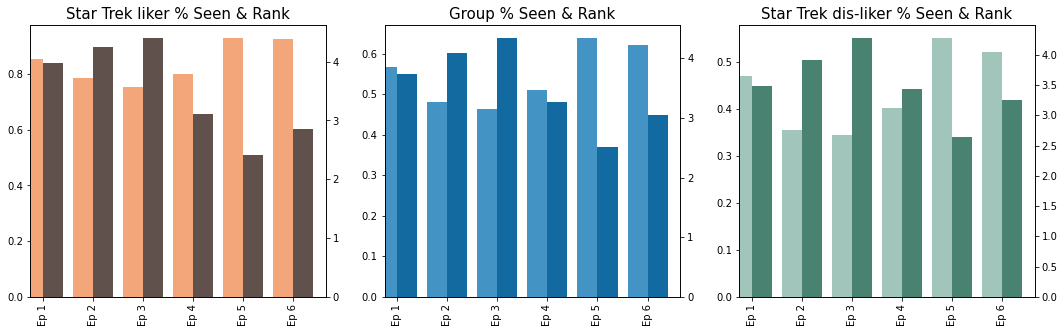

In [13]:
# % seen and rank
fig = plt.figure(figsize=(18,5))
ax = fig.add_subplot(131)#  Star Trek liker % seen and average rank
ax2 = ax.twinx() 
width = 0.4
trekkies.iloc[1,2:8].plot(kind="bar", color="#F2A679", ax=ax, width=width, position=1)
trekkies.iloc[1,8:14].plot(kind="bar", color="#61514C", ax=ax2, width=width, position=0)
ax.set_xticks([0,1,2,3,4,5])
ax.set_xticklabels(ep_index)
plt.title("Star Trek liker % Seen & Rank", size=15)
ax = fig.add_subplot(132) # group % seen and average rank
ax2 = ax.twinx() 
width = 0.4
group_means.iloc[2:8].plot(kind="bar", color="#4393C4", ax=ax, width=width, position=1)
group_means.iloc[8:14].plot(kind="bar", color="#126AA1", ax=ax2, width=width, position=0)
ax.set_xticks([0,1,2,3,4,5])
ax.set_xticklabels(ep_index)
plt.title("Group % Seen & Rank", size=15)
ax = fig.add_subplot(133) # Star Trek dis-liker % seen and average rank
ax2 = ax.twinx() 
width = 0.4
trekkies.iloc[0,2:8].plot(kind="bar", color="#A1C4BB", ax=ax, width=width, position=1)
trekkies.iloc[0,8:14].plot(kind="bar", color="#498271", ax=ax2, width=width, position=0)
ax.set_xticks([0,1,2,3,4,5])
ax.set_xticklabels(ep_index)
plt.title("Star Trek dis-liker % Seen & Rank", size=15)
plt.show()

In [14]:
# trekkies
age_groups = star_wars.groupby("Age").mean()
age_groups

,RespondentID,Seen any of the first 6 Star Wars movies?,seen_ep_1,seen_ep_2,seen_ep_3,seen_ep_4,seen_ep_5,seen_ep_6,rank_ep_1,rank_ep_2,rank_ep_3,rank_ep_4,rank_ep_5,rank_ep_6
Age,,,,,,,,,,,,,,
18-29,3.290464e+09,0.825688,0.733945,0.678899,0.665138,0.697248,0.733945,0.733945,4.100000,4.100000,3.966667,2.994444,2.722222,3.116667
30-44,3.290218e+09,0.772388,0.652985,0.589552,0.567164,0.656716,0.735075,0.735075,4.347826,4.309179,4.475728,2.932367,2.212560,2.714976
45-60,3.289923e+09,0.824742,0.621993,0.508591,0.487973,0.567010,0.756014,0.721649,3.541667,4.170833,4.537500,3.308333,2.437500,3.004167
> 60,3.290001e+09,0.717472,0.531599,0.394052,0.371747,0.386617,0.624535,0.587361,3.010417,3.761658,4.316062,3.808290,2.730570,3.357513
